
# Project: Investigate a Dataset - [udemy_courses.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>

<a id='intro'></a>
## Introduction

## Dataset Description: 
#### this dataset contains 3.682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) taken from Udemy.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

<a id='wrangling'></a>
## Data Wrangling


In [2]:
df =pd.read_csv("udemy_courses.csv")

df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
df.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
df["published_timestamp"] = pd.to_datetime(df["published_timestamp"])

In [6]:
df.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [7]:
df.describe().round()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.0,3678.0,3678.0,3678.0,3678.0,3678.0
mean,675972.0,66.0,3197.0,156.0,40.0,4.0
std,343273.0,61.0,9504.0,935.0,50.0,6.0
min,8324.0,0.0,0.0,0.0,0.0,0.0
25%,407692.0,20.0,111.0,4.0,15.0,1.0
50%,687917.0,45.0,912.0,18.0,25.0,2.0
75%,961356.0,95.0,2546.0,67.0,46.0,4.0
max,1282064.0,200.0,268923.0,27445.0,779.0,78.0



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
#check for missing values:

df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [9]:
# check for duplicated values to drop them:

df.duplicated().any()

True

In [10]:
# drop duplicated values:

df = df.drop_duplicates()

In [11]:
df.duplicated().any()

False

<a id='eda'></a>
## Exploratory Data Analysis


In [12]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


### Research Question 1 (What is The Number of Courses Per Subjects?)

In [13]:
df["subject"].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


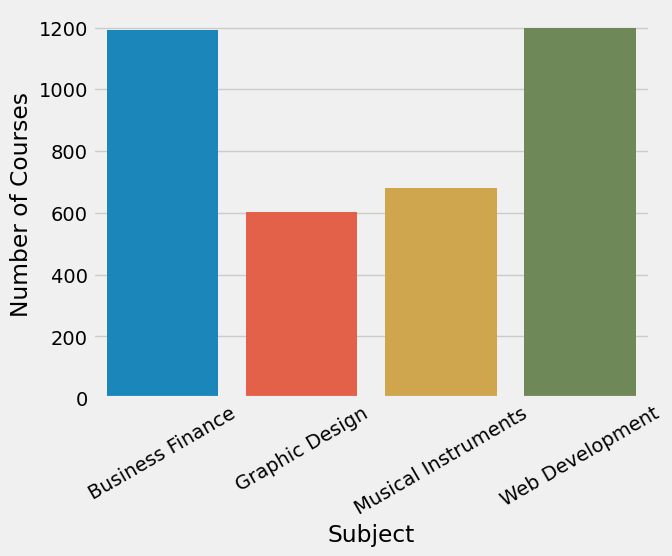

In [14]:
sns.countplot("subject", data=df)

plt.xlabel("Subject")
plt.ylabel("Number of Courses")
plt.xticks(rotation = 30);

### Research Question 2  (For Which Levels, Udemy  Providing The Courses?)

In [15]:
sup_levels = df["level"].unique()

print("Udemy Courses  are Providided for the following levels : ", sup_levels)

Udemy Courses  are Providided for the following levels :  ['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']


### Research Question 3 (Display The Count of Paid and Free Courses?)

In [16]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Courses')

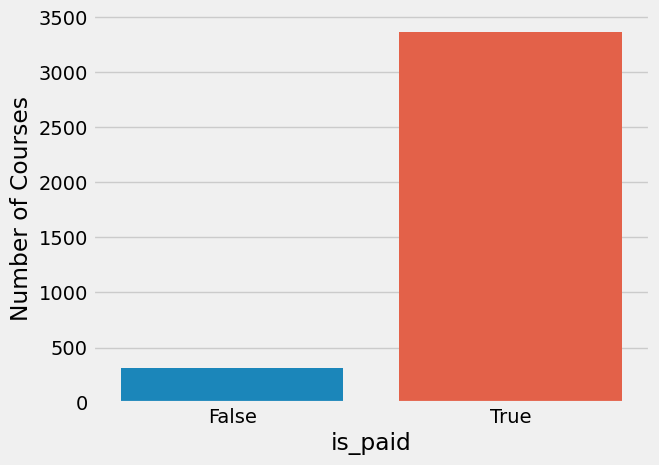

In [17]:
sns.countplot("is_paid", data=df)

plt.ylabel("Number of Courses")

### Research Question 4 (Which Course Has More Lectures (Free or Paid)?)

In [18]:
more_lectures = df.nlargest(1,"num_lectures")["course_title"]

print("The Course That Has The Highest Number of Lectures is :",more_lectures)

The Course That Has The Highest Number of Lectures is : 2707    Back to School Web Development and Programming...
Name: course_title, dtype: object


### Research Question 5 (Which Courses Have A Higher Number of Subscribers (Free or Paid)?)

In [19]:
more_subscribers = df.nlargest(1,"num_subscribers")["course_title"]

print("The Course That Has The Highest Number of Subscribers is :", more_subscribers)

The Course That Has The Highest Number of Subscribers is : 2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object


### Research Question 6 (What is the Most Popular Course Title?)

In [20]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [21]:
most_pop = df.nlargest(1,"num_subscribers")["course_title"]

print("the Most Popular Course Title is: ", most_pop);

the Most Popular Course Title is:  2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object


### Research Question 7 (Which Course Is Having The Highest Number of Reviews?)

In [22]:
more_reviews = df.nlargest(1,"num_reviews")["course_title"]

print("The Course With The Highest Number of Reviews is :", more_reviews)

The Course With The Highest Number of Reviews is : 3230    The Web Developer Bootcamp
Name: course_title, dtype: object


### Research Question 8 (What are Top 10 Most Popular Courses As Per Number of Subscribers?)

In [23]:
top_subs = df.nlargest(10, "num_subscribers").sort_values(by = "num_subscribers")

top_subs

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19 03:02:05+00:00,Web Development
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10 15:19:29+00:00,Web Development
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13 18:29:47+00:00,Web Development
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15 17:00:33+00:00,Musical Instruments
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development


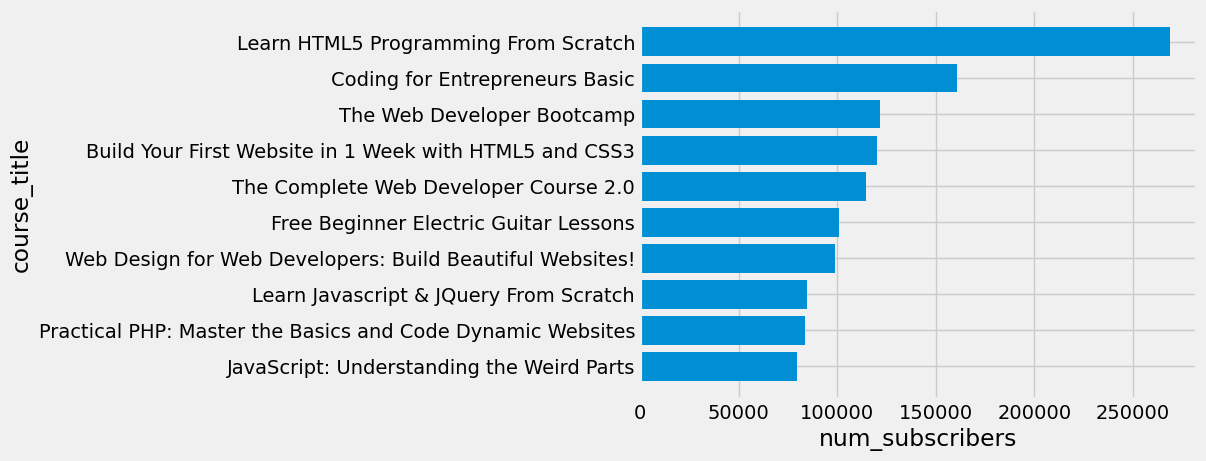

In [24]:
plt.barh(top_subs["course_title"],top_subs["num_subscribers"])

plt.ylabel("course_title")
plt.xlabel("num_subscribers");

### Research Question 9 (Does Price Affect the Number of Reviews?)

In [25]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

Text(0, 0.5, 'num_reviews')

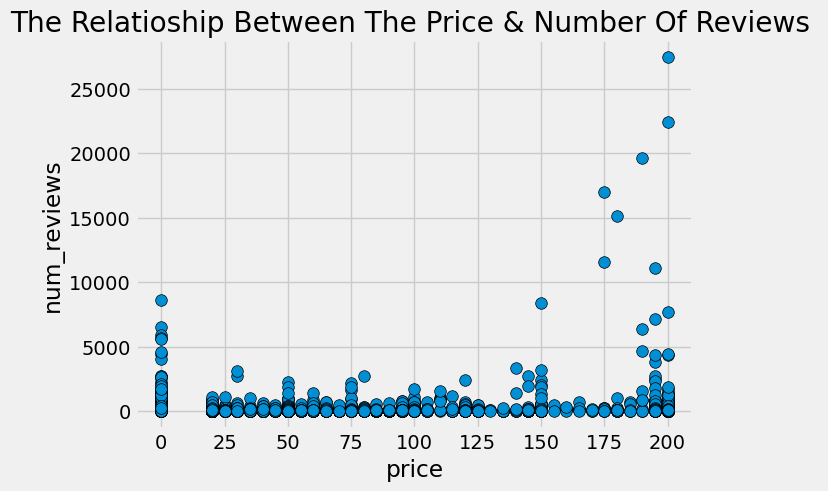

In [26]:
plt.scatter(df["price"],df["num_reviews"], edgecolor = "black" ,s = 70)


plt.title("The Relatioship Between The Price & Number Of Reviews ")
plt.xlabel("price")
plt.ylabel("num_reviews")

### Research Question 10 (What Is The Total Number of Courses Related To Python?)

In [27]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [28]:
py_courses = len(df[df["course_title"].str.contains("Python", case = False)])

print("The Total Number of Courses Related To Python is: " ,py_courses)

The Total Number of Courses Related To Python is:  29


### Research Question 11 (In Which Year The Highest Number of Courses Were Posted?)

In [29]:
df["Year"] = df["published_timestamp"].dt.year

In [30]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


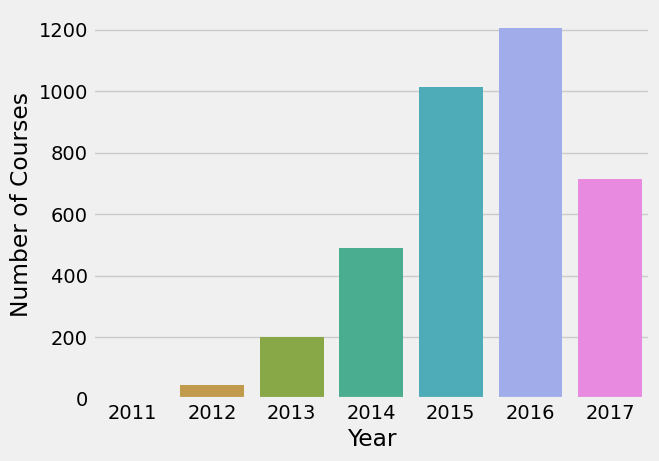

In [31]:
sns.countplot("Year", data=df)

plt.xlabel("Year")
plt.ylabel("Number of Courses");

### Research Question 11 (Display The Count of Posted Subjects (Year Wise)?) 

In [32]:
[df.groupby("Year")["subject"].value_counts()]

[Year  subject            
 2011  Web Development          5
 2012  Web Development         19
       Graphic Design          10
       Musical Instruments     10
       Business Finance         6
 2013  Business Finance        84
       Web Development         55
       Musical Instruments     39
       Graphic Design          23
 2014  Business Finance       192
       Musical Instruments    120
       Web Development        113
       Graphic Design          65
 2015  Business Finance       339
       Web Development        336
       Musical Instruments    171
       Graphic Design         168
 2016  Web Development        448
       Business Finance       347
       Musical Instruments    228
       Graphic Design         181
 2017  Business Finance       223
       Web Development        223
       Graphic Design         155
       Musical Instruments    112
 Name: subject, dtype: int64]